## Logistic Regression using sklearn library 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('../../src/cleaned_data/cleaned_data.csv')

In [3]:
# Separate features (X) and target (y)
X = df.drop('Label', axis=1)
y = df['Label']

# Split into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [4]:
# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Initialize and train the model
model = LogisticRegression(
    penalty='l2',  # L2 regularization to prevent overfitting
    C=1.0,         # Inverse of regularization strength (smaller = stronger regularization)
    solver='lbfgs',
    class_weight='balanced',  # Adjusts for class imbalance
    random_state=42
)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [6]:
# Predict on test set
y_pred = model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.4f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Accuracy: 89.5882%

Confusion Matrix:
[[746 156]
 [ 21 777]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       902
           1       0.83      0.97      0.90       798

    accuracy                           0.90      1700
   macro avg       0.90      0.90      0.90      1700
weighted avg       0.91      0.90      0.90      1700



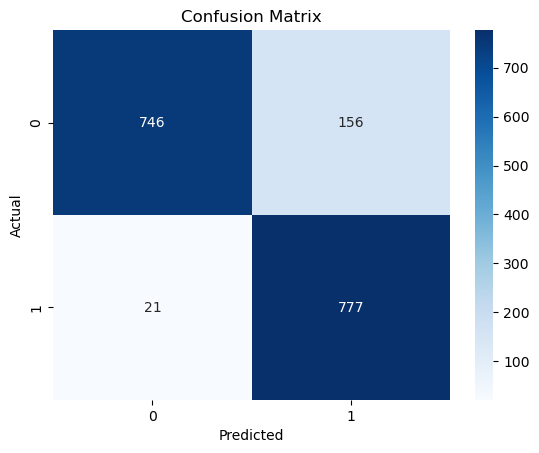

In [7]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()